 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [41]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [18]:
# Reading whale returns
whale_returns_path = Path("./Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_path)
whale_returns_df.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [19]:
# Count nulls
#csv_data.isnull().sum()
whale_returns_df.isnull().sum()


Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [20]:
# Drop nulls
# csv_data = csv_data.dropna().copy()
#whale_returns_df.isnull().sum()
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.drop(columns=['Date'], inplace=True)
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df.head()
#whale_returns_df.dtypes

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [21]:
# Reading algorithmic returns
algo_returns_path = Path("./Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path)

In [22]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [23]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna().copy()
#algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.drop(columns=['Date'], inplace=True)
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head()
#algo_returns_df.isnull().sum()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [24]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("./Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_path)


In [25]:
# Check Data Types
sp500_history_df.dtypes
sp500_history_df.head()
sp500_history_df.columns

Index(['Date', 'Close'], dtype='object')

In [26]:
# Fix Data Types
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.drop(columns=['Date'], inplace=True)
sp500_history_df = sp500_history_df.sort_index()

#Remove "$" from Close price
sp500_history_df["Close"] = sp500_history_df["Close"].astype('string')
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")
sp500_history_df["Close"] = sp500_history_df["Close"].astype('float')

#sp500_history_df["Close"].head()
#sp500_history_df["Close"].dtype



c:\Users\P630461\Anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [33]:
#Calculate Daily Returns and rename columns
sp500_dailyreturn_df = sp500_history_df.pct_change()
sp500_dailyreturn_df.head()

# sp500_dailyreturn_df.set_index(pd.to_datetime(sp500_dailyreturn_df['Date'], infer_datetime_format=True), inplace=True)
# sp500_dailyreturn_df.drop(columns=['Date'], inplace=True)
# sp500_dailyreturn_df = sp500_dailyreturn_df.sort_index()
#sp500_dailyreturn_df.columns


sp500_dailyreturn_df.columns = ["SP500"]

#sp500_history_df.head()
sp500_dailyreturn_df.head()

,SP500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [28]:
## Combine Whale, Algorithmic, and S&P 500 Returns

In [29]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.


In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

whale_return_21std_df = whale_returns_df.rolling(window=21).std()
algo_returns_std21_df = algo_returns_df.rolling(window=21).std()
sp500_dailyreturn_std21_df = sp500_dailyreturn_df.rolling(window=21).std()




<AxesSubplot:xlabel='Date'>

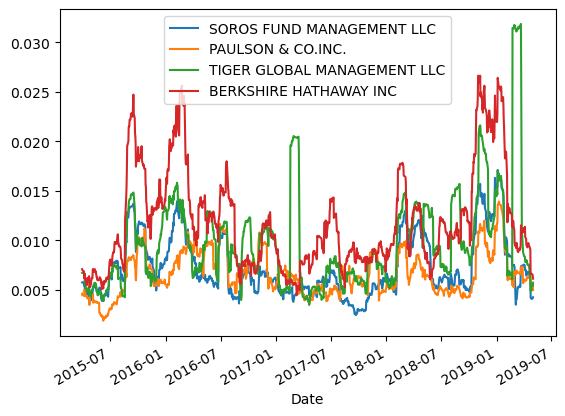

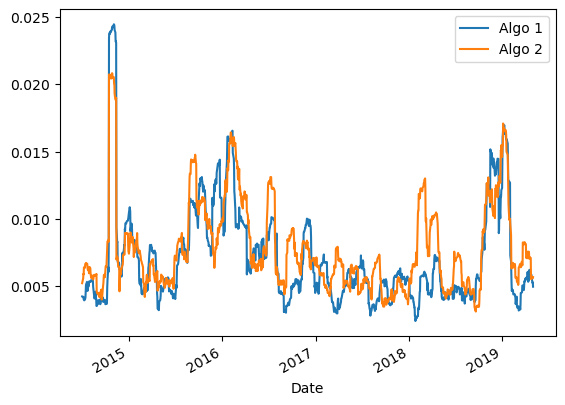

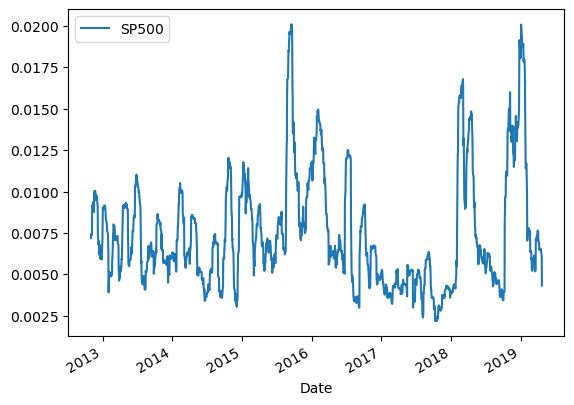

In [35]:
# Plot the rolling standard deviation

whale_return_21std_df.plot()
algo_returns_std21_df.plot()
sp500_dailyreturn_std21_df.plot()

### Calculate and plot the correlation

In [39]:
# Calculate the correlation
# combined_df = pd.concat([msft_df, sp500_df], axis="columns", join="inner")
# combined_df

whalesp_combined_df = pd.concat([whale_returns_df, sp500_dailyreturn_df], axis="columns", join="inner")
whalesp_combined_df
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500
Date,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944
...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579


In [40]:
algosp_combined_df = pd.concat([algo_returns_df, sp500_dailyreturn_df], axis="columns", join="inner")
algosp_combined_df

,Algo 1,Algo 2,SP500
Date,,,
2014-06-05,0.004062,0.013285,0.006525
2014-06-06,0.001857,0.008284,0.004628
2014-06-09,-0.005012,0.005668,0.000939
2014-06-10,0.004406,-0.000735,-0.000246
2014-06-11,0.004760,-0.003761,-0.003537
...,...,...,...
2019-04-16,-0.006945,0.002899,0.000509
2019-04-17,-0.010301,-0.005228,-0.002274
2019-04-18,-0.000588,-0.001229,0.001579


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [50]:
# Calculate covariance of a single portfolio

whalesp_price_covariance = whalesp_combined_df.cov()
#sns.heatmap(whalesp_price_covariance, vmin=-1, vmax=1)


In [51]:

# Calculate variance of S&P 500

sp500_variance = sp500_dailyreturn_df['SP500'].var()
sp500_variance


6.579270583158746e-05

In [57]:
# Computing beta
# Calculate beta of all daily returns of MSFT
whales_beta = whalesp_price_covariance["SOROS FUND MANAGEMENT LLC"] / sp500_variance
whales_beta

SOROS FUND MANAGEMENT LLC      0.947474
PAULSON & CO.INC.              0.589885
TIGER GLOBAL MANAGEMENT LLC    0.733723
BERKSHIRE HATHAWAY INC         1.169471
SP500                          0.860050
Name: SOROS FUND MANAGEMENT LLC, dtype: float64

<AxesSubplot:>

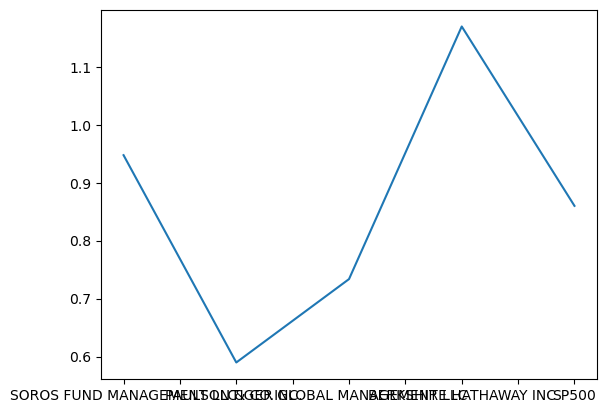

In [58]:

# Plot beta trend
whales_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

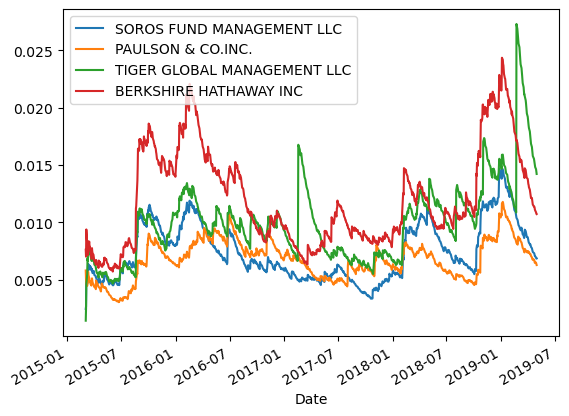

In [56]:
# Use `ewm` to calculate the rolling window

whales_ewm = whale_returns_df.ewm(halflife=21).std().plot()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!